### Train Bike Rental log count model XGBoost algorithm

In [2]:
# install xgboost 
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.8 MB/s eta 0:00:00:00:0100:01


In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

import xgboost as xgb

In [6]:
column_list_file = "bike_train_columns_list_rev3.txt"
train_file = "bike_train_rev3.csv"
validation_file = "bike_validation_rev3.csv"
test_file = "bike_test_rev3.csv"

In [8]:
columns = ''
with open(column_list_file, 'r') as f:
    columns = f.read().split(',')

In [9]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [10]:
df_train = pd.read_csv(train_file, names=columns)
df_validation = pd.read_csv(validation_file, names=columns)

In [11]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [12]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [16]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0].ravel()

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [59]:
# creating xgboost with suggested hyperparameters

regressor = xgb.XGBRegressor(max_depth=5, n_estimators=150)

In [60]:
regressor.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_validation, y_validation)])

[0]	validation_0-rmse:1.09526	validation_1-rmse:1.07167
[1]	validation_0-rmse:0.86855	validation_1-rmse:0.85094
[2]	validation_0-rmse:0.71852	validation_1-rmse:0.70620
[3]	validation_0-rmse:0.61078	validation_1-rmse:0.60450
[4]	validation_0-rmse:0.53109	validation_1-rmse:0.53023
[5]	validation_0-rmse:0.47017	validation_1-rmse:0.47573
[6]	validation_0-rmse:0.43944	validation_1-rmse:0.44969
[7]	validation_0-rmse:0.42017	validation_1-rmse:0.43368
[8]	validation_0-rmse:0.39699	validation_1-rmse:0.41308
[9]	validation_0-rmse:0.37165	validation_1-rmse:0.39090
[10]	validation_0-rmse:0.36265	validation_1-rmse:0.38352
[11]	validation_0-rmse:0.34992	validation_1-rmse:0.37414
[12]	validation_0-rmse:0.33666	validation_1-rmse:0.36241
[13]	validation_0-rmse:0.32912	validation_1-rmse:0.35733
[14]	validation_0-rmse:0.32212	validation_1-rmse:0.35159
[15]	validation_0-rmse:0.31083	validation_1-rmse:0.34112
[16]	validation_0-rmse:0.30835	validation_1-rmse:0.34033
[17]	validation_0-rmse:0.30602	validation

[144]	validation_0-rmse:0.17419	validation_1-rmse:0.28924
[145]	validation_0-rmse:0.17404	validation_1-rmse:0.28917
[146]	validation_0-rmse:0.17348	validation_1-rmse:0.28914
[147]	validation_0-rmse:0.17340	validation_1-rmse:0.28923
[148]	validation_0-rmse:0.17307	validation_1-rmse:0.28909
[149]	validation_0-rmse:0.17251	validation_1-rmse:0.28920


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
df_train['count'].describe()

count    7620.000000
mean        4.583886
std         1.429959
min         0.693147
25%         3.737670
50%         4.976734
75%         5.652489
max         6.885510
Name: count, dtype: float64

In [62]:
eval_result = regressor.evals_result()

In [63]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

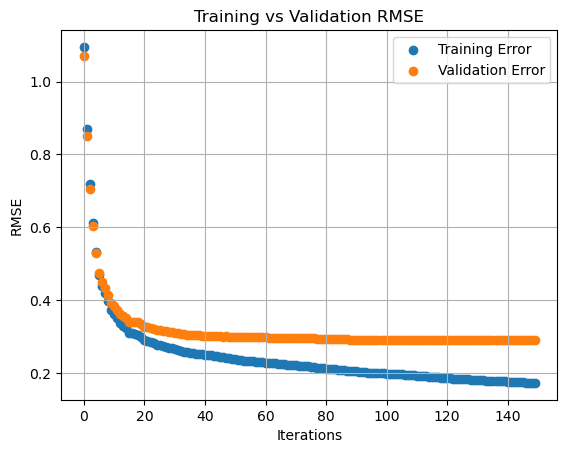

In [64]:
plt.scatter(x=training_rounds, y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds, y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training vs Validation RMSE')
plt.legend()
plt.show()

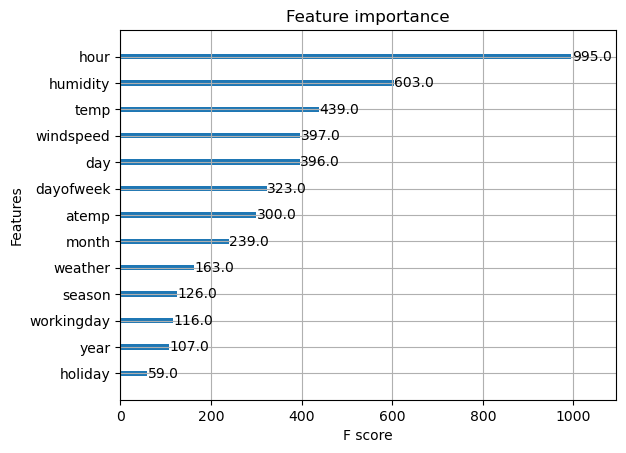

In [65]:
xgb.plot_importance(regressor)
plt.show()


In [66]:
df = pd.read_csv(validation_file, names = columns)

In [67]:
# Compare actual vs predicted in with test dataset

df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [68]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       3        0           1        2  28.70  33.335        79    12.9980   
1       2        0           0        1  32.80  37.880        55    12.9980   
2       1        0           1        1  14.76  16.665        40    19.9995   
3       1        0           1        1   9.02   9.090        47    36.9974   
4       4        0           0        1  10.66  15.150        87     0.0000   

   year  month  day  dayofweek  hour  
0  2011      7    7          3     8  
1  2011      6   11          5    13  
2  2011      2   14          0     2  
3  2011      2    8          1    10  
4  2011     12    4          6     8  


In [69]:
result = regressor.predict(X_test)

In [70]:
result[:5]

array([6.053212 , 5.9359384, 1.3226197, 4.0439215, 4.2267604],
      dtype=float32)

In [71]:
df['count_predicted'] = result

In [72]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,6.053212
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,5.935938
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,1.322620
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,4.043921
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,4.226760


In [73]:
df['count_predicted'].describe()

count    3266.000000
mean        4.594542
std         1.378379
min         0.497854
25%         3.775636
50%         4.979265
75%         5.617390
max         6.854691
Name: count_predicted, dtype: float64

In [74]:
df[df['count_predicted']<0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


In [75]:
def adjust_count(x):
    if x <0:
        return 0
    else:
        return x

In [76]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [77]:
df[df['count_predicted']<0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


In [78]:
df['count'] = df['count'].map(np.expm1)
df['count_predicted'] = df['count_predicted'].map(np.expm1)

In [79]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,443.0,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,424.477542
1,387.0,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,377.394900
2,2.0,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,2.753241
3,48.0,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,56.049623
4,55.0,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,67.494975


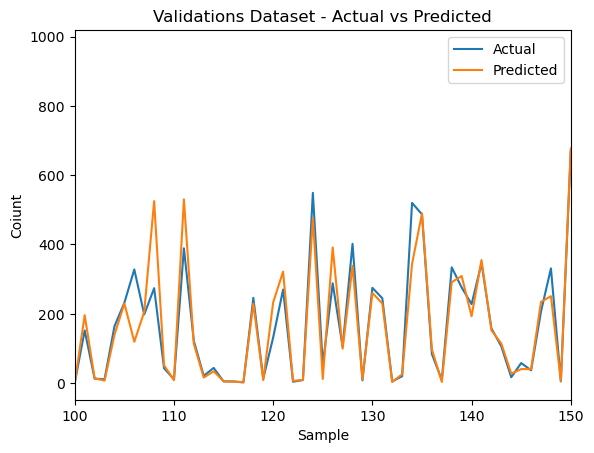

In [80]:
plt.plot(df['count'],label='Actual')
plt.plot(df['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Coiunt')
plt.xlim([100,150])
plt.title('Validations Dataset - Actual vs Predicted')
plt.legend()
plt.show()

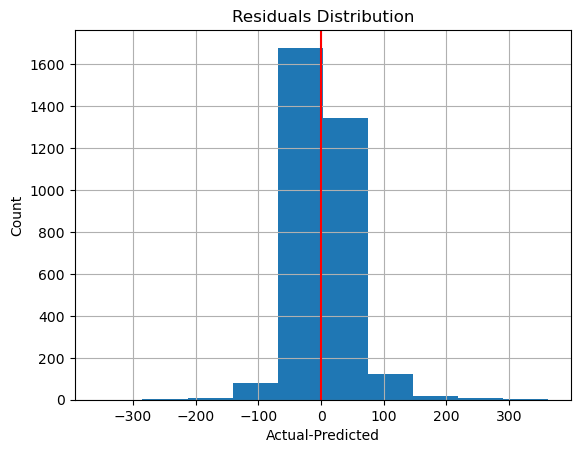

In [81]:
# Over predition and under predictions balance

residuals = (df['count']-df['count_predicted'])

plt.hist(residuals)
plt.xlabel('Actual-Predicted')
plt.ylabel('Count')
plt.grid()
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [82]:
value_counts = (residuals > 0).value_counts(sort=False)

print(' Under EStimation: {0:.2f}'.format(value_counts[True]/len(residuals)))
print(' Over EStimation: {0:.2f}'.format(value_counts[False]/len(residuals)))


 Under EStimation: 0.54
 Over EStimation: 0.46


In [83]:
print('RMSE: {0:.2f}'.format(mean_squared_error(df['count'],df['count_predicted'])**.5))

RMSE: 42.32


In [87]:
# Metric use by Kaggle

def compute_rmsle(y_true, y_pred):
    if(type(y_true) != np.ndarray):
        y_true = np.array(y_true)
    
    if(type(y_pred) != np.ndarray):
        y_pred = np.array(y_pred)
        
    return(np.average((np.log1p(y_pred)-np.log1p(y_true))**2)**.5)

In [88]:
print("RMSLE:  {0:.2f}".format(compute_rmsle(df['count'],df['count_predicted'])))

RMSLE:  0.29


In [90]:
# prepare data for suission to kaggle

df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [93]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [94]:
df_test.shape

(6493, 14)

In [95]:
# Exclude datetime for prediction

X_test = df_test.iloc[:, 1:]
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [96]:
result = regressor.predict(X_test)

In [97]:
result[:5]

array([2.178234  , 1.8829607 , 1.6226288 , 0.95476675, 0.79331774],
      dtype=float32)

In [98]:
np.expm1(result)

array([  7.8306985,   5.5729365,   4.0663915, ..., 120.21744  ,
        90.556946 ,  54.498924 ], dtype=float32)

In [99]:
# Convert result to actual count

df_test['count'] = np.expm1(result)

In [100]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,7.830698
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,5.572937
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,4.066391
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,1.598065
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,1.210719


In [101]:
df_test[df_test['count']<0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count


In [103]:
df_test[['datetime','count']]

,datetime,count
0,2011-01-20 00:00:00,7.830698
1,2011-01-20 01:00:00,5.572937
2,2011-01-20 02:00:00,4.066391
3,2011-01-20 03:00:00,1.598065
4,2011-01-20 04:00:00,1.210719
...,...,...
6488,2012-12-31 19:00:00,280.022003
6489,2012-12-31 20:00:00,172.622299
6490,2012-12-31 21:00:00,120.217438
6491,2012-12-31 22:00:00,90.556946


In [104]:
df_test[['datetime','count']].to_csv('predicted_count_rev3.csv', index=False)